In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier#adaBoost分类器
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import classification_report

In [29]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征
x1, y1 = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=2)
# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3
x2, y2 = make_gaussian_quantiles(
    mean=(3, 3), n_samples=500, n_features=2, n_classes=2)  # 3.3是中心点
# 将两组数据合成一组数据
x_data = np.concatenate((x1, x2))
y_data = np.concatenate((y1, -y2+1))  # 1变0 ，0变1，吧模型变复杂，紫色和黄色分开

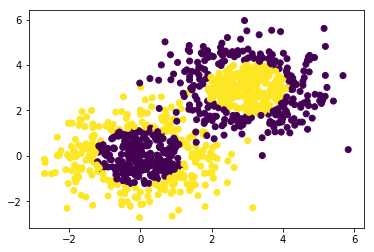

In [30]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

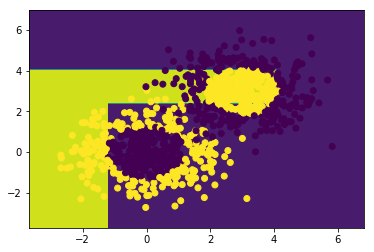

In [31]:
# 决策树模型
model = tree.DecisionTreeClassifier(max_depth=3)#决策树深度为3

# 输入数据建立模型
model.fit(x_data, y_data)

# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [32]:
# 模型准确率
model.score(x_data,y_data)

0.757

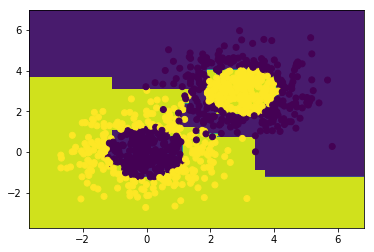

In [33]:
# AdaBoost模型
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=10) #深度为3，迭代10次
# 训练模型
model.fit(x_data, y_data)

# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 获取预测值
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [34]:
# 模型准确率
model.score(x_data,y_data) #准确率直线上升，使分类错误的样本得到纠正

0.984